In [1]:
import pandas as pd #data processing
import numpy as np #linear algebra

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
df= pd.read_csv('data.csv')

In [3]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [5]:
df.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


# Visualizations

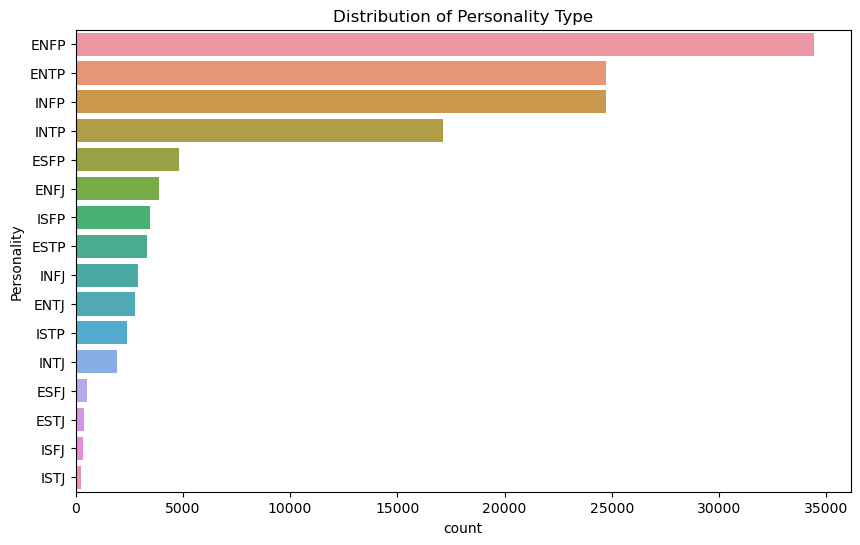

In [6]:
1.#Check the distribution of the target variable (personality)

plt.figure(figsize=(10,6))
sns.countplot(y=df['Personality'], order=df['Personality'].value_counts().index)
plt.title('Distribution of Personality Type')
plt.show()

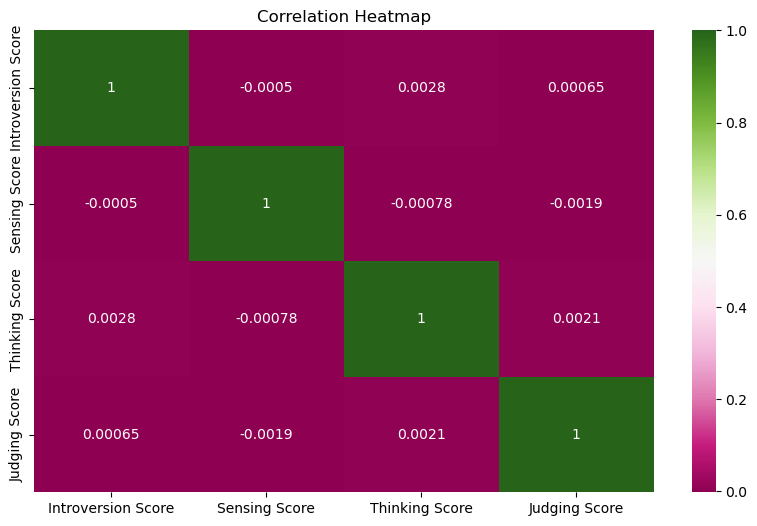

In [7]:
#plot correlation heatmap of numerical features 
plt.figure(figsize=(10,6))
sns.heatmap(df[['Introversion Score','Sensing Score', 'Thinking Score', 'Judging Score']].corr(), annot=True, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

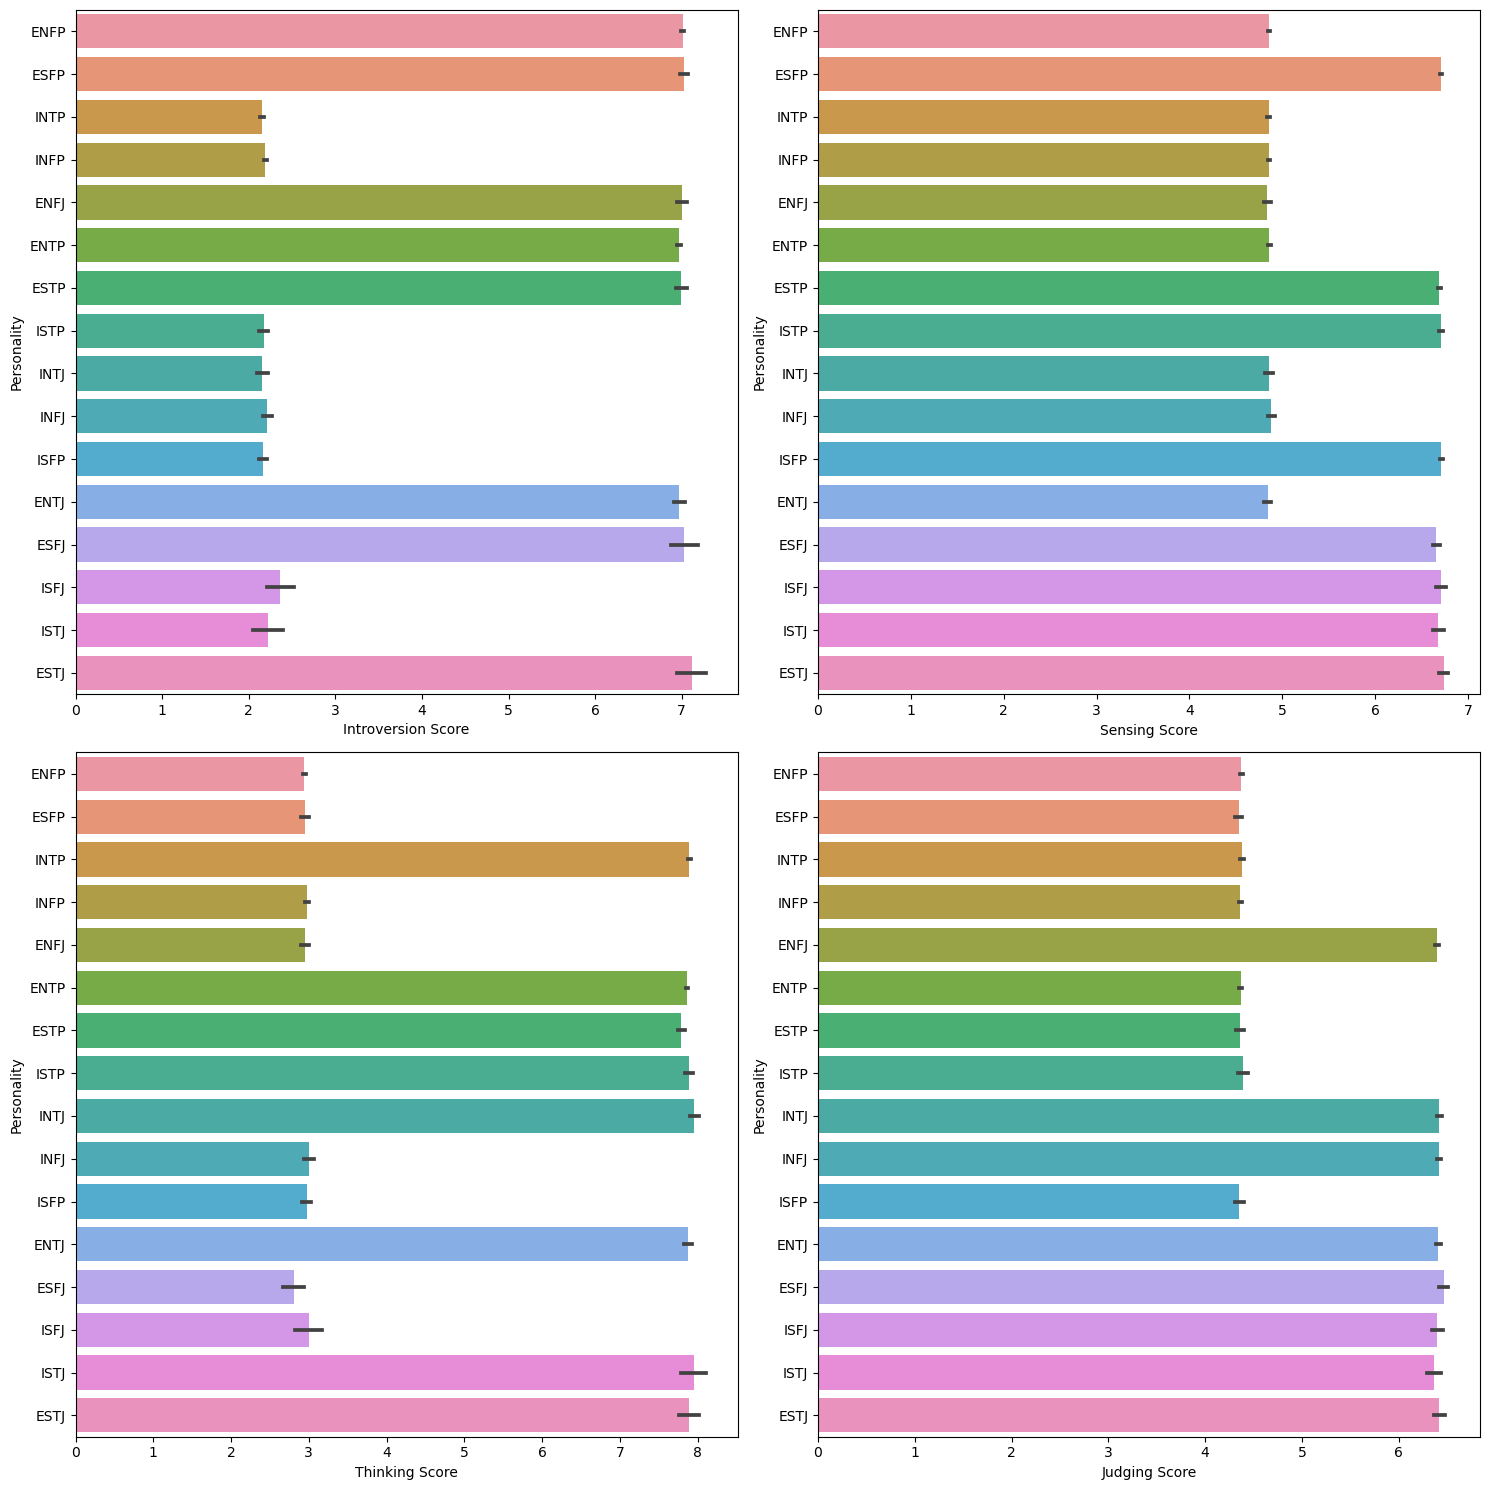

In [8]:
#How different scores affect personality type

fig, ax=plt.subplots(2,2, figsize=(15,15))
sns.barplot(data=df, y='Personality', x='Introversion Score', estimator='mean', ax=ax[0][0])
sns.barplot(data=df, y='Personality', x='Sensing Score', estimator='mean', ax=ax[0][1])
sns.barplot(data=df, y='Personality', x='Thinking Score', estimator='mean', ax=ax[1][0])
sns.barplot(data=df, y='Personality', x='Judging Score', estimator='mean', ax=ax[1][1])
plt.tight_layout()
plt.show()



Findings:

Introversion Score Analysis:
1. INTJ and INTP types have the highest introversion scores, indicating that these personality types tend to be more introverted.
2. ENFJ and ENTP types have lower introversion scores, aligning with their extraverted traits.
3. Overall, types with an ''I''(Introversion) as the first letter tend to score higher in introversion, whereas those with an "E" (Extraversion) score low.

Sensing Score Analysis:

1. ESTJ and ISTJ types have the highest sensing scores, which suggests they are more likely to rely on concrete, sensory information.

2. Personality types with "N" (intuition) as their second letter, such as INTJ, ENTP, and INFJ, have lower sensing scores, indicating a preference for intuition over sensing.

Correlation Between Introversion and Sensing Scores:

1. Extroverted sensing types like ESTP and ESFP show high sensing scores but lower introversion, demonstrating the connection between extroversion and sensory processing.
2. Conversely, introverted intuitive types like INFJ and INTJ tend to have lower sensing scores but higher introversion scores.

Patterns Across Personality Types:

1. Sensing types (e.g., ESTJ, ISTJ, ESFJ) generally display lower introversion scores and higher sensing scores, as sensing is typically associated with a more hands-on, practical approach, often aligned with extroversion or a balanced personality.
2. Intuitive types, particularly those who are introverted (e.g., INTJ, INFJ), seem to prefer internal thinking processes and abstract thinking over sensory data.

Thinking Score:

1. INTP, ENTJ, and INTJ have the highest thinking scores, showing a strong preference for logical decision-making.
2. ESFJ, ISFJ, and INFJ have lower thinking scores, indicating a tendency towards feeling-based or emotional-based decision-making.
Judging Score:

1. ESTJ and ISTJ have the highest judging scores, highlighting their preference for structure and planning.
2. Perceiving types like ENFP and ESFP score lower, showing a preference for flexibility and spontaneity.


In [9]:
#how education and gender affects personality

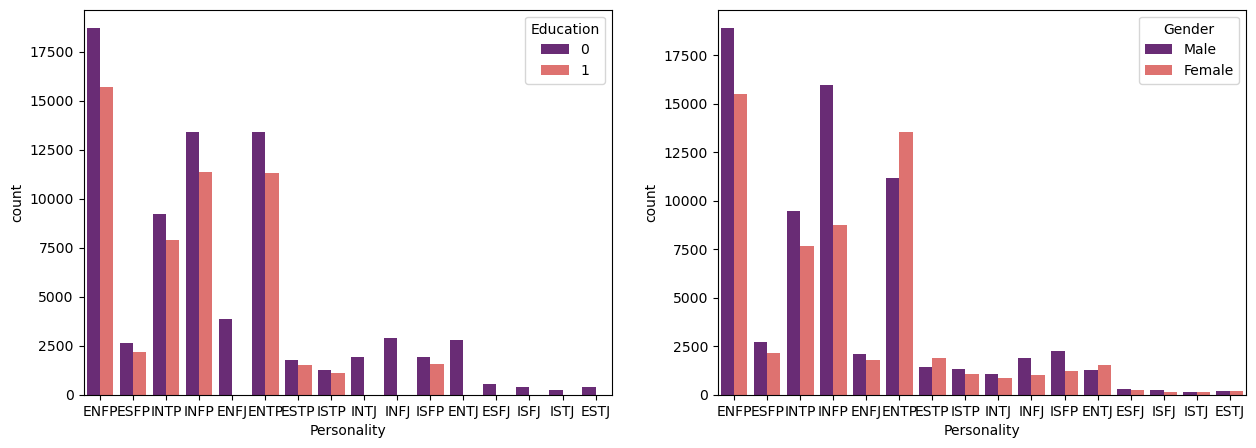

In [10]:
fig, ax=plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x='Personality', hue='Education', palette='magma', ax=ax[0])
sns.countplot(data=df, x='Personality', hue='Gender', palette='magma', ax=ax[1])
plt.show()

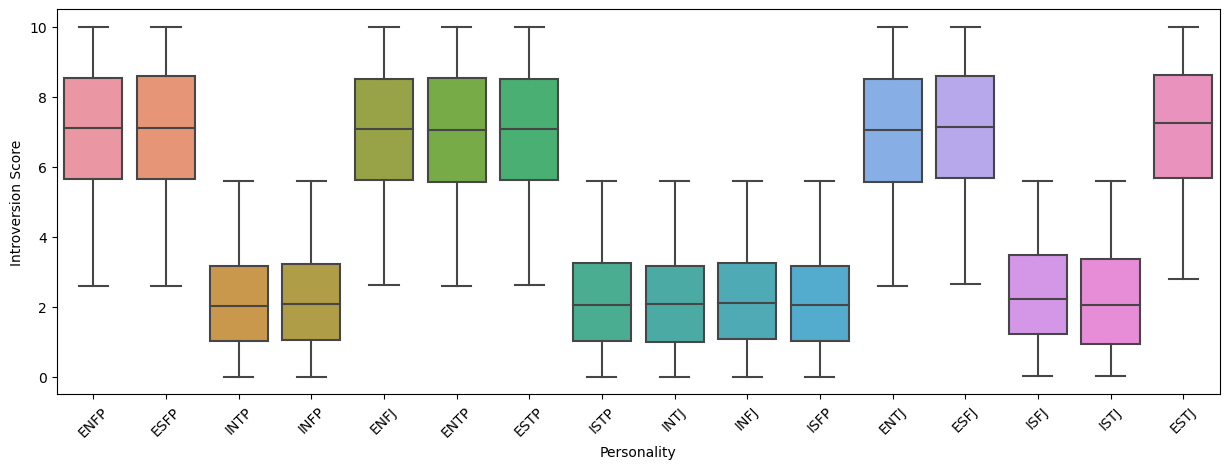

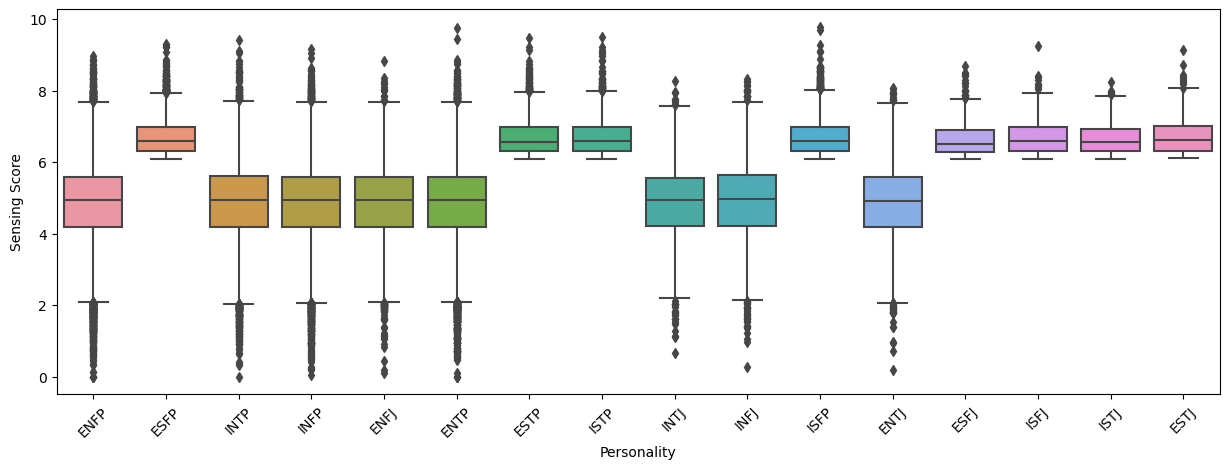

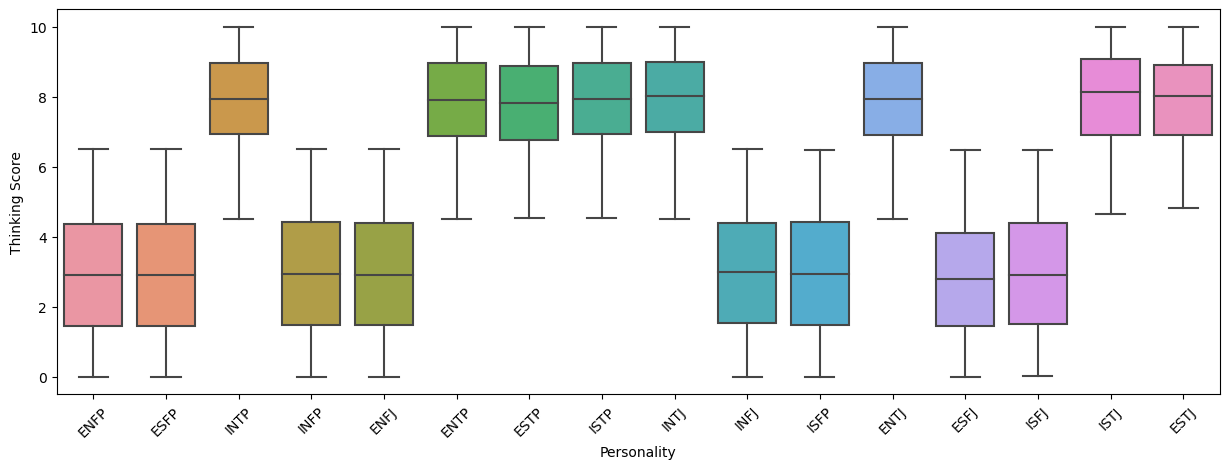

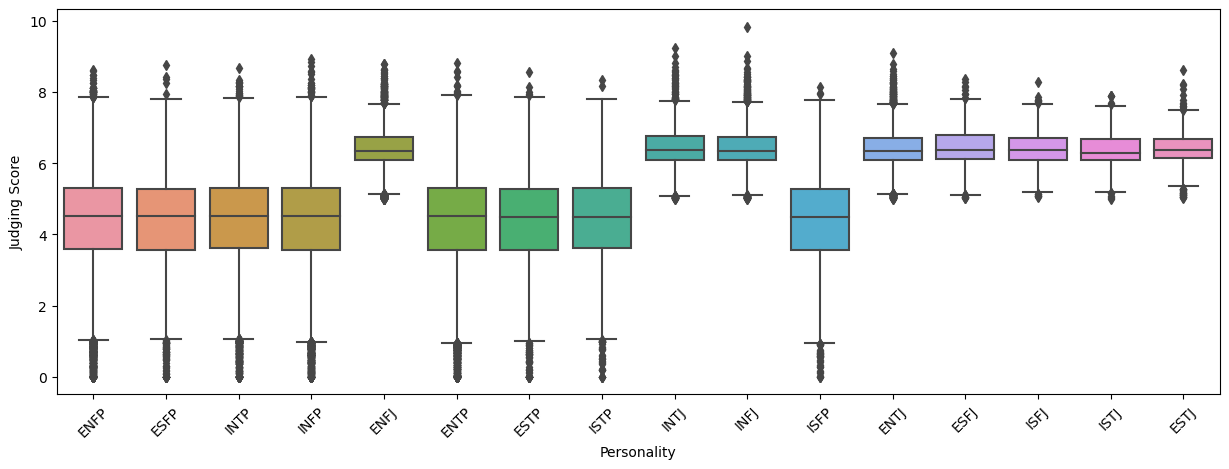

In [11]:
#boxplot

plt.figure(figsize=(15,5))
sns.boxplot(x='Personality', y='Introversion Score', data=df)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(15,5))
sns.boxplot(x='Personality', y='Sensing Score', data=df)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(15,5))
sns.boxplot(x='Personality', y='Thinking Score', data=df)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(15,5))
sns.boxplot(x='Personality', y='Judging Score', data=df)
plt.xticks(rotation=45)
plt.show()

In [24]:
numerical_features=['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']

In [26]:
import warnings
warnings.filterwarnings("ignore", message=".*tight_layout.*")

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


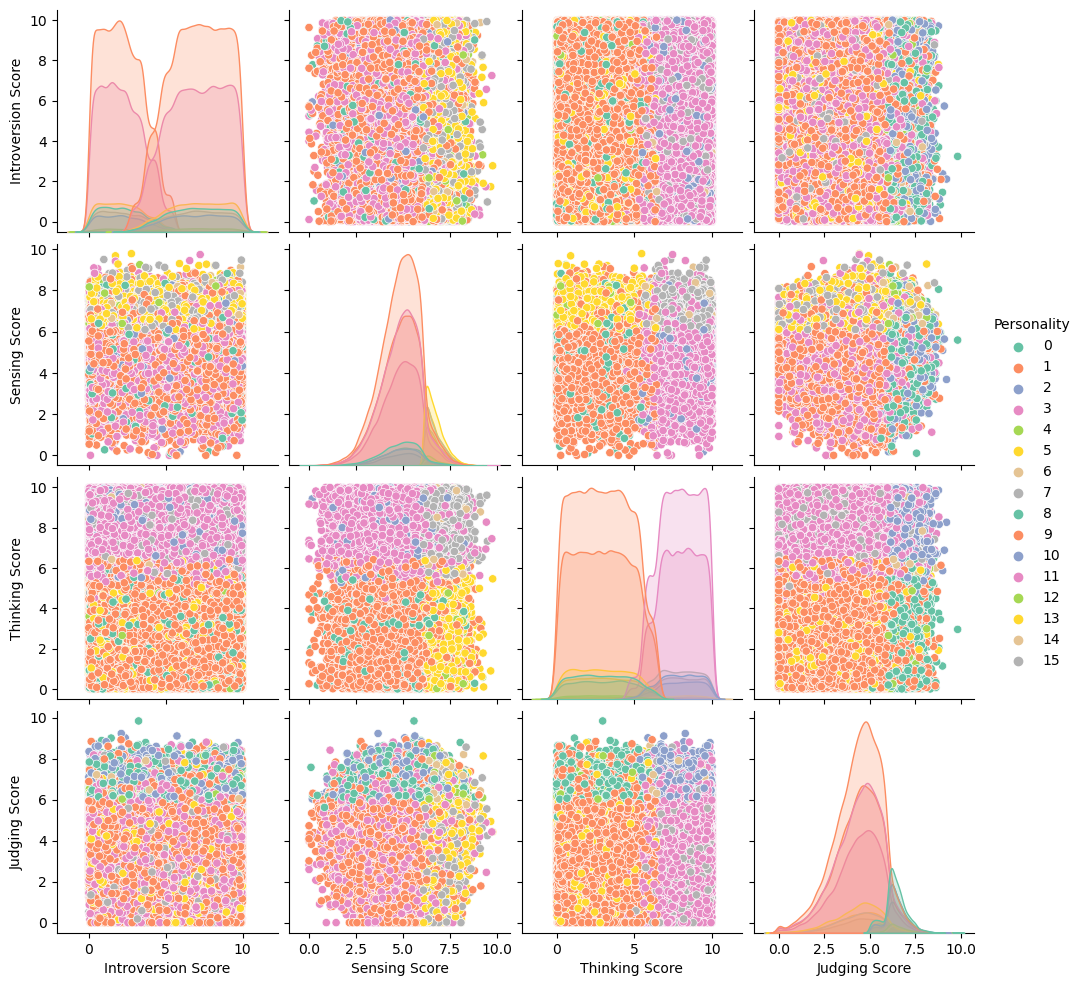

In [27]:
#Pairplot between numerical features, colored by personality
sns.pairplot(df, hue='Personality', vars=numerical_features, diag_kind='kde', palette='Set2')
plt.show()

# MACHINE LEARNING 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [13]:
df.isnull().any()  #No Null Values :)


Age                   False
Gender                False
Education             False
Introversion Score    False
Sensing Score         False
Thinking Score        False
Judging Score         False
Interest              False
Personality           False
dtype: bool

In [14]:
#we have some categorical values, encoding them using Label encoder.
#Not using one hot encoding as i will be using ensemble models

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  int32  
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  int32  
 8   Personality         128061 non-null  int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 7.3 MB
None


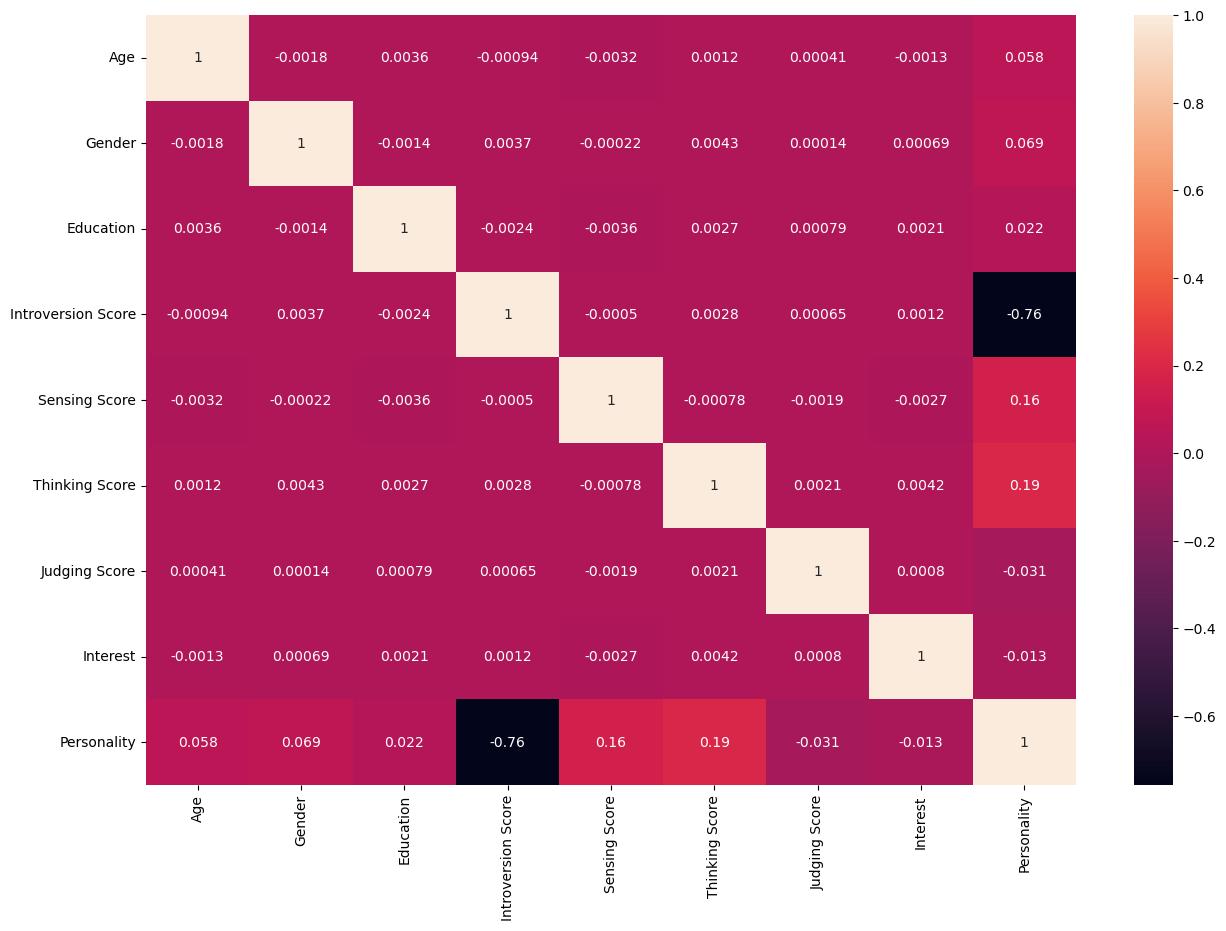

In [15]:
#how the categories are related to each other using a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
x=df.drop(columns='Personality')
y=df['Personality']
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
print(mi_df)

              Feature  Mutual Information
0      Thinking Score            0.577984
1  Introversion Score            0.522888
2       Sensing Score            0.242949
3       Judging Score            0.171781
4           Education            0.058896
5                 Age            0.033124
6              Gender            0.016936
7            Interest            0.014384


In [17]:
#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_t, x_te, y_t, y_te=train_test_split(x,y,test_size=0.25, random_state=20)

# Ensemble Models

In [18]:
#importing
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report,confusion_matrix

In [19]:
rf=RandomForestClassifier()
params={'criterion': ['gini', 'entropy'], 'n_estimators':[150]}
nrf=RandomizedSearchCV(rf,param_distributions=params, n_jobs=-1,cv=10, scoring='accuracy', n_iter=2)
nrf.fit(x_t, y_t)
print(nrf.best_score_)
print(nrf.best_params_)
nrf=nrf.best_estimator_
pred_t=nrf.predict(x_t)
pred=nrf.predict(x_te)

0.902462405587122
{'n_estimators': 150, 'criterion': 'gini'}


In [20]:
    ada=AdaBoostClassifier(algorithm='SAMME')
    params={
        'n_estimators': [150],
        'learning_rate': np.arange(0.01,2.01,0.01),}
    nada=RandomizedSearchCV(ada, param_distributions=params, cv=10, n_jobs=-1,scoring='accuracy')
    nada.fit(x_t, y_t)
    print(nada.best_params_)
    print(nada.best_score_)
    nada=nada.best_estimator_ 
    pred1_t=nada.predict(x_t)
    pred1=nada.predict(x_te)

{'n_estimators': 150, 'learning_rate': 1.31}
0.7975540709330508
